In [1]:
import pandas as pd
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors= 'coerce')

In [6]:
df = df.dropna(subset = ['TotalCharges'])

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
df.loc[:, 'SeniorCitizen'] = df['SeniorCitizen'].map({'Yes': 1, 'No': 0})

In [22]:
df.loc[:, 'ChurnNumeric'] = df['Churn'].map({'Yes': 1, 'No': 0})

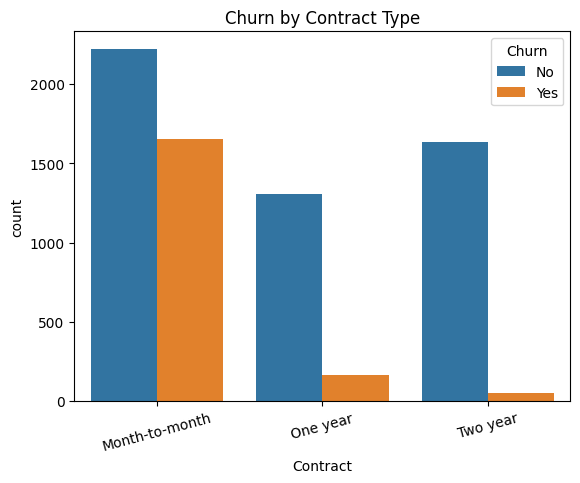

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x = 'Contract' , hue = 'Churn', data=df)
plt.title("Churn by Contract Type")
plt.xticks(rotation = 15)
plt.show()


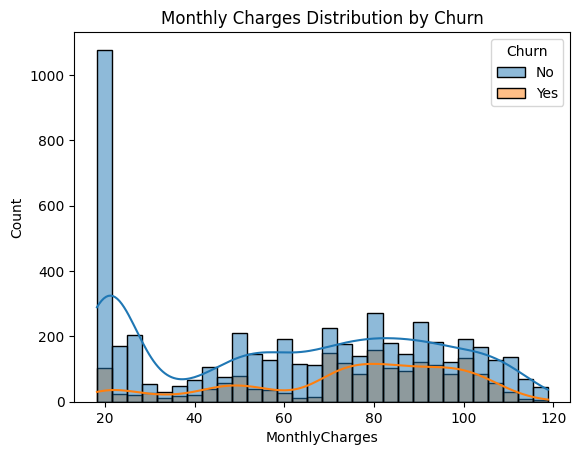

In [24]:
sns.histplot(data = df, x='MonthlyCharges', hue = 'Churn', bins=30, kde= True)
plt.title('Monthly Charges Distribution by Churn')
plt.show()


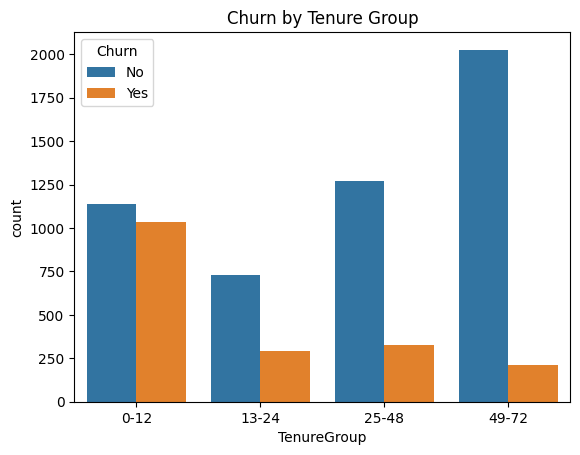

In [27]:
df.loc[:, 'TenureGroup'] = pd.cut(df['tenure'], bins=[0,12,24,48,72], labels = ['0-12', '13-24', '25-48', '49-72'])
sns.countplot(x = 'TenureGroup', hue = 'Churn', data = df)
plt.title('Churn by Tenure Group')
plt.show()

In [28]:
df.to_csv("Cleaned_Telco_Churn.csv", index=False)

In [30]:
def charge_bin(x):
    if x < 20:
        return "<20"
    elif x < 40:
        return "20–39"
    elif x < 60:
        return "40–59"
    elif x < 80:
        return "60–79"
    elif x < 100:
        return "80–99"
    else:
        return "100+"

df.loc[:,'MonthlyChargeGroup'] = df['MonthlyCharges'].apply(charge_bin)


In [31]:
df.to_csv('Cleaned_Telco_Churn_With_Buckets.csv', index="False")